In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pairplotr


  Using cached pairplotr-1.2.3.1.tar.gz (9.7 kB)

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\KrystleWest\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\KrystleWest\\AppData\\Local\\Temp\\pip-install-3vtjh_oy\\pairplotr_b43597d7079644c8895c384ffd8acc9c\\setup.py'"'"'; __file__='"'"'C:\\Users\\KrystleWest\\AppData\\Local\\Temp\\pip-install-3vtjh_oy\\pairplotr_b43597d7079644c8895c384ffd8acc9c\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\KrystleWest\AppData\Local\Temp\pip-pip-egg-info-p8wy88t9'
         cwd: C:\Users\KrystleWest\AppData\Local\Temp\pip-install-3vtjh_oy\pairplotr_b43597d7079644c8895c384ffd8acc9c\
    Complete output (7 lines):
    Traceback (most recent call last):
      File "<string>", 


  Using cached pairplotr-1.2.3.tar.gz (9.7 kB)


In [3]:
# Imports
import warnings
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'png' #retina
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import math
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [4]:
train = pd.read_csv("train_cleaned.csv")
test = pd.read_csv("test_cleaned.csv")

train_ID = train['House_Id']
test_ID = test['House_Id']


train.drop("House_Id", axis = 1, inplace = True)
test.drop("House_Id", axis = 1, inplace = True)


In [5]:
print('Train Data: \n')
print("Number of columns: "+ str(train.shape[1]))
print("Number of rows: "+ str(train.shape[0]))
print('\nTest Data: \n')
print("Number of columns: "+ str(test.shape[1]))
print("Number of rows: "+ str(test.shape[0]))

Train Data: 

Number of columns: 18
Number of rows: 1458

Test Data: 

Number of columns: 17
Number of rows: 1459


In [6]:
#descriptive statistics summary
train['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

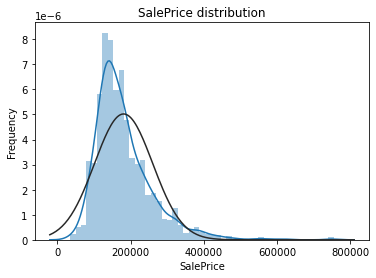

In [7]:
sns.distplot(train.SalePrice,fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution');

(mu, sigma) = norm.fit(train['SalePrice']);


In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
import sklearn
import slearn
from sklearn.model_selection import train_test_split

In [10]:
# Create our features
X = pd.get_dummies(train.drop(columns='SalePrice'))

# Create our target
y = train['SalePrice']

In [11]:
X.info()
X.describe()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1458 non-null   int64  
 1   YearBuilt     1458 non-null   int64  
 2   YearRemodAdd  1458 non-null   int64  
 3   MasVnrArea    1458 non-null   float64
 4   BsmtFinSF1    1458 non-null   int64  
 5   TotalBsmtSF   1458 non-null   int64  
 6   FirstFlrSF    1458 non-null   int64  
 7   SecFlrSF      1458 non-null   int64  
 8   GrLivArea     1458 non-null   int64  
 9   FullBath      1458 non-null   int64  
 10  TotRmsAbvGrd  1458 non-null   int64  
 11  Fireplaces    1458 non-null   int64  
 12  GarageYrBlt   1458 non-null   float64
 13  GarageCars    1458 non-null   int64  
 14  GarageArea    1458 non-null   int64  
 15  WoodDeckSF    1458 non-null   int64  
 16  OpenPorchSF   1458 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 193.8 KB


,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,FirstFlrSF,SecFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61
1,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0
2,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42
3,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35
4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84


In [12]:
y.value_counts()

140000    20
135000    17
145000    14
155000    14
110000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 662, dtype: int64

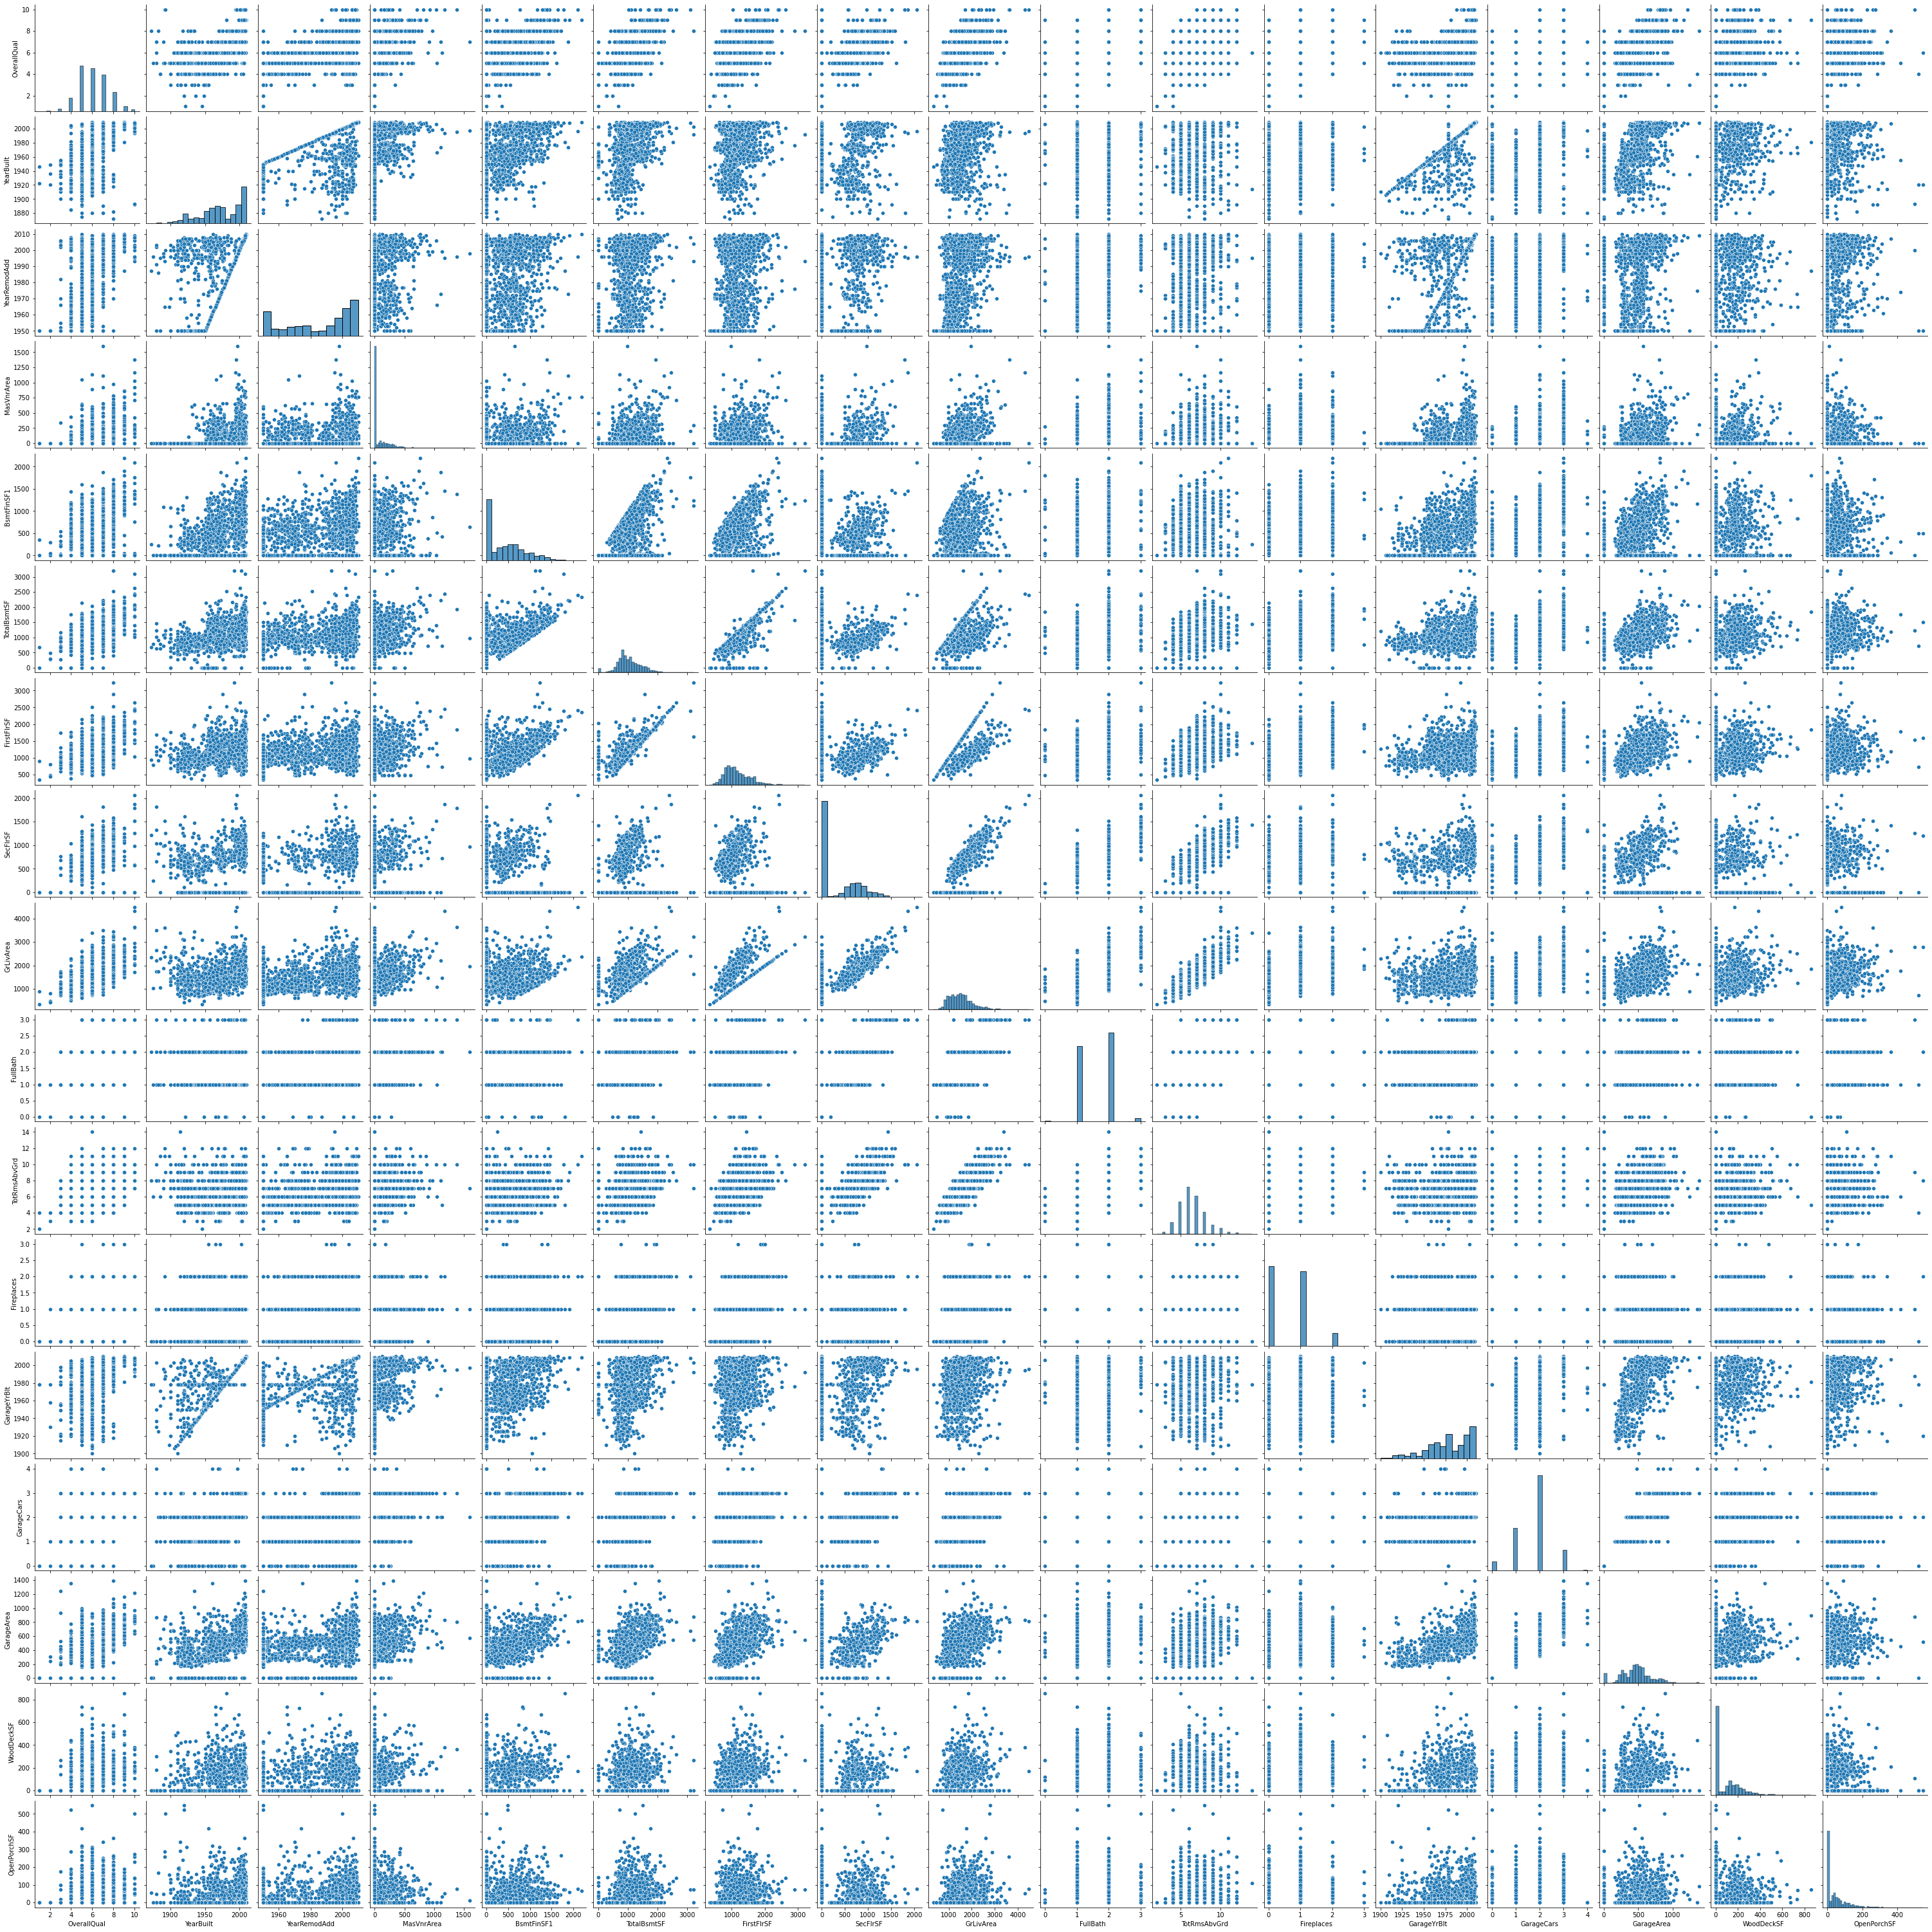

In [13]:
sns.pairplot(X)

In [14]:
#X['SQFT']= X.iloc[]'BsmtFinSF1' + 'TotalBsmtSF' + 'FirstFlrSF' + 'SecFlrSF'
column_names = ['BsmtFinSF1','TotalBsmtSF','FirstFlrSF','SecFlrSF']

X['SQFT']= X[column_names].sum(axis=1)
            

# How is the Sale Price of the Home Effected by Square Footage

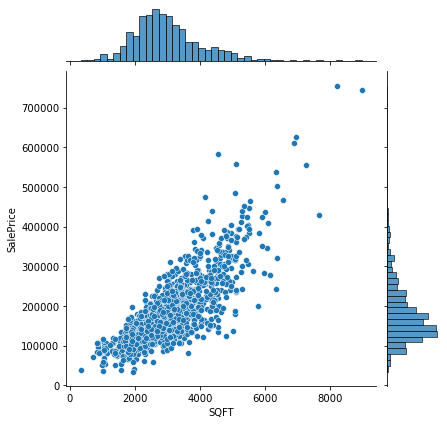

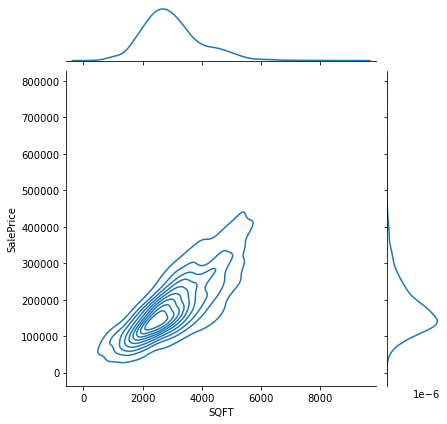

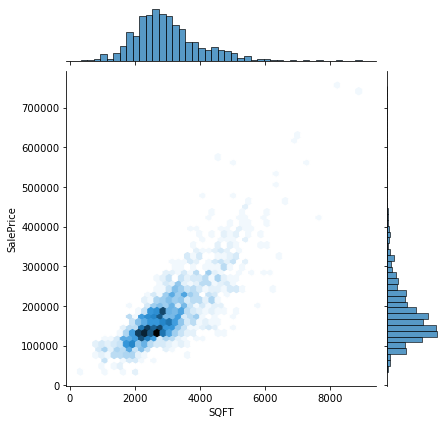

In [15]:

sns.jointplot(x=X["SQFT"] ,
             y=y,
             data=X)
sns.jointplot(x=X["SQFT"] ,
             y=y,
             data=X,
             kind='kde')
sns.jointplot(x=X["SQFT"] ,
             y=y,
             data=X,
             kind='hex')

# Trending data: as the Square Footage increases the Sale Price of the home increases

In [16]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1453    175000
1454    210000
1455    266500
1456    142125
1457    147500
Name: SalePrice, Length: 1458, dtype: int64

In [17]:
X

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,FirstFlrSF,SecFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SQFT
0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,3272
1,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,3502
2,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,3192
3,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,2689
4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,3998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,6,1999,2000,0.0,0,953,953,694,1647,2,7,1,1999.0,2,460,0,40,2600
1454,6,1978,1988,119.0,790,1542,2073,0,2073,2,7,2,1978.0,2,500,349,0,4405
1455,7,1941,2006,0.0,275,1152,1188,1152,2340,2,9,2,1941.0,1,252,0,60,3767
1456,5,1950,1996,0.0,49,1078,1078,0,1078,1,5,0,1950.0,1,240,366,0,2205


# Data Prep for Machine Learning

In [27]:
class NeuralNet(object):
    def __init__(self):
        self.X_Train, self.X_Test, self.Y_Train,self.Y_Test = self.preprocessing()

    @staticmethod
    def preprocessing():
        X_Data = X[['SQFT', 
                     'YearBuilt', 
                     'YearRemodAdd']]
        Y_Data = y #SalePrice
        #X_Data = X_Data.apply(lambda x:( (x - x.min()) / (x.max()-x.min())))
        X_Train, X_Test, Y_Train,Y_Test = train_test_split(X_Data,
                                                               Y_Data,
                                                               test_size=0.3,
                                                               random_state=101)
        return X_Train, X_Test, Y_Train,Y_Test
    
    def model_get(self):
        self.lm = LinearRegression()
        self.lm.fit(self.X_Train,self.Y_Train)
        return self.lm.intercept_ , self.lm.coef_
    
    def predict(self):
        predicted = self.lm.predict(X_Test)
        return predicted

In [28]:
lm = LinearRegression

In [29]:

obj = NeuralNet()
lm.intercept_ , lm.coef_ = obj.model_get()
df1 = pd.DataFrame(lm.coef_,['SQFT', 
                     'YearBuilt', 
                     'YearRemodAdd'],
                   columns=["Coeff"])
df1


,Coeff
SQFT,56.051715
YearBuilt,402.201641
YearRemodAdd,695.064369


# For every 1 unit increase in Sq Ft Sale Price increases by 483950  For every 1 unit increase in year built the Sale Price will increase 55504

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [31]:
predicted = obj.predict()
predicted

NameError: name 'X_Test' is not defined

In [ ]:
X_Train, X_Test, Y_Train,Y_Test = obj.preprocessing()
sns.scatterplot(predicted, Y_Test)

In [ ]:
sns.distplot((Y_Test- predicted))

In [ ]:
plt.figure(figsize= (15 , 15))
sns.heatmap(X_train.corr(),cmap="Blues")

In [ ]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_features = []
for numerical_feature in X_train.columns:
    if X_train[numerical_feature].dtype in numeric_dtypes:
        numerical_features.append(numerical_feature)
        
plot , ax = plt.subplots(12,3 , figsize = (20 , 90))
for index in range(len(numerical_features)-1):
    sns.scatterplot(data = X_train , y = y , x = numerical_features[index] , alpha=0.4 , ax = ax[math.floor(index/3)][index%3])
plt.show()

In [ ]:
all_data = pd.concat([train_data, test_data]).reset_index(drop=True)
sale_price = X_train[y]
all_data.drop(columns = [y] , inplace = True)
all_data.shape